# Introduction
This will essentially be how the final model should look like on the interface. We want to make it so that we can just run this one program to get our entire interface and model. 

This will keep our project organized when we try to keep the final model.

In [1]:
# Libraries - Any and all libraries should be gathered at the top here

import pandas as pd  # dataset
import seaborn as sns  #visualization (plottings)
import matplotlib.pyplot as plt  #visualization
import numpy as np  # arrays, algebra, dealing with numbers
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

In [2]:
# from flask import Flask, render_template, request
# import requests
# import re
# import spotipy
# import csv
# from spotipy.oauth2 import SpotifyClientCredentials

# app = Flask(__name__)


# @app.route('/')
# def index():
#     return render_template('index.html')




# @app.route('/get_songs', methods=['POST'])
# def get_songs():
#     # Get the playlist URL from the form on the webpage
#     playlist_url = request.form['playlist_url']

#     # Extract the playlist ID from the URL
#     match = re.search('(https://open.spotify.com/playlist/)(\w+)(\?.*|$)', playlist_url)
#     playlist_id = match.group(2)

#     # Get an access token for the Spotify Web API
#     client_id = '59716ee804104ee7b913e244cc67fd55'
#     client_secret = 'ed17be9c7e0d44838de69ec300b36849'
#     auth_url = 'https://accounts.spotify.com/api/token'
#     auth_response = requests.post(auth_url, {
#         'grant_type': 'client_credentials',
#         'client_id': client_id,
#         'client_secret': client_secret,
#     })
#     auth_response_data = auth_response.json()
#     access_token = auth_response_data['access_token']

#     # Use the access token to get the playlist data
#     api_url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
#     headers = {'Authorization': f'Bearer {access_token}'}
#     response = requests.get(api_url, headers=headers)
#     response_data = response.json()

#     # Get the song names and audio features from the playlist data
#     song_names = []
#     audio_features = []
#     sp = spotipy.Spotify(auth=access_token)
#     for item in response_data['items']:
#         track_uri = item['track']['uri']
#         track_name = item['track']['name']
#         song_names.append(track_name)
#         audio_features.append(sp.audio_features(track_uri)[0])

#     # Write the song data to a CSV file
#     with open('songs.csv', 'w', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(['Name', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration (ms)'])
#         for name, features in zip(song_names, audio_features):
#             writer.writerow([name, features['danceability'], features['energy'], features['key'], features['loudness'], features['mode'], features['speechiness'], features['acousticness'], features['instrumentalness'], features['liveness'], features['valence'], features['tempo'], features['duration_ms']])

#     # Render the song data on a new webpage
#     return render_template('songs.html', song_names=song_names, audio_features=audio_features, zip=zip)



# if __name__ == '__main__':
#     app.run(debug=True)


# Part 1 - Interface Design
This part is responsible for the look of the interface and where all buttons go. We will worry about this at the end.

# Part 2 - Interface Input
The first part of the final submission should be taking the link and gathering the song data on the songs from the spotify playlist

## Part 2.1 --> Taking in the input
This section is for reading the link. Create cells under this for code in relation to the link

In addition, let's see if we can get the data on a singular song from its spotify link

## Part 2.2 - Gathering the data
This section is actually using the link and scraping the playlist for the song details (maybe use the API)

Additional thought - should we have user verify the playlist the code returns? if this playlist is wrong, how will we deal with that situation?

## Part 2.3 - The Scraped Dataset
Take the songs from the link and gather their data using the API
Not sure if you can scrape only certain information, or if you scrape all the data for the song using the API. We can work around that later. 

# Part 3 - Cleaning the Data and Running the Model
This section is responsible for data cleaning from the orignal dataset (ie. directly from what we scrape). 

We will then run the KNN model (This will need to be rechanged from when we get part 2 completed from what we have right now)
We are taking a prior based on the 20K songs we have. Maybe we can have some bayesian theory here for getting an output. But more on that later. 


https://towardsdatascience.com/how-to-use-pairwise-correlation-for-robust-feature-selection-20a60ef7d10#:~:text=The%20quickest%20and%20often%20the,numeric%20features%20in%20the%20dataset.

This source is useful for later formatting of data. Please do not remove the link.

## Part 3.1 - Cleaning the Data for the model features
This section is for taking the given dataset, blinding the data, and normalizing it for our necessary means. We will also do this for the test data point (our new song). This is essential for our model to work on any given playlist. We need to make this as ready to accept as many test cases as possible.

Essentially, KNN is trained onto the given playlist and then our test data is the new song. If the actual for the Y is not equal to the predicted for the Y, we will say the song is not a good fit for the playlist.

In [3]:
music_orig = pd.read_csv('songs.csv', encoding='ISO-8859-1')
# this will be the scraped datase. We need to rename it appropriately later
list(music_orig.columns)
#music_orig.head()

['Name',
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Mode',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration (ms)']

In [4]:
music = music_orig.drop(columns = ['Name'], axis='columns').dropna()
music

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms)
0,0.778,0.632,2,-5.600,0,0.0493,0.27400,0.000000,0.0915,0.498,122.104,218289
1,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040
2,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064
3,0.565,0.636,0,-8.198,1,0.0638,0.10700,0.000010,0.4470,0.525,170.010,179551
4,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806
...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.881,0.592,2,-4.898,1,0.0324,0.61900,0.000013,0.0901,0.719,101.058,154487
71,0.697,0.683,1,-2.881,0,0.1170,0.03720,0.000000,0.1370,0.603,96.133,186987
72,0.637,0.690,1,-4.057,0,0.0405,0.00786,0.000000,0.1240,0.457,129.857,162399
73,0.650,0.760,0,-4.422,0,0.0446,0.25500,0.000000,0.3390,0.838,93.057,214194


In [5]:
scaled_music = pd.DataFrame(normalize(music, axis=0), columns=music.columns)
scaled_music.head()

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms)
0,0.134535,0.113212,0.039467,-0.096662,0.000000,0.061318,0.077482,0.000000,0.052713,0.108464,0.113626,0.124700
1,0.088883,0.130767,0.019733,-0.102427,0.154303,0.074378,0.000413,0.000140,0.051676,0.072745,0.159132,0.114275
2,0.121393,0.147785,0.118401,-0.065368,0.000000,0.074751,0.002497,0.000000,0.038829,0.199286,0.095827,0.116003
3,0.097702,0.113928,0.000000,-0.141506,0.154303,0.079353,0.030258,0.000014,0.257516,0.114344,0.158206,0.102571
4,0.102198,0.136857,0.019733,-0.094660,0.154303,0.060074,0.010831,0.000000,0.059338,0.104108,0.158130,0.081008


<AxesSubplot: >

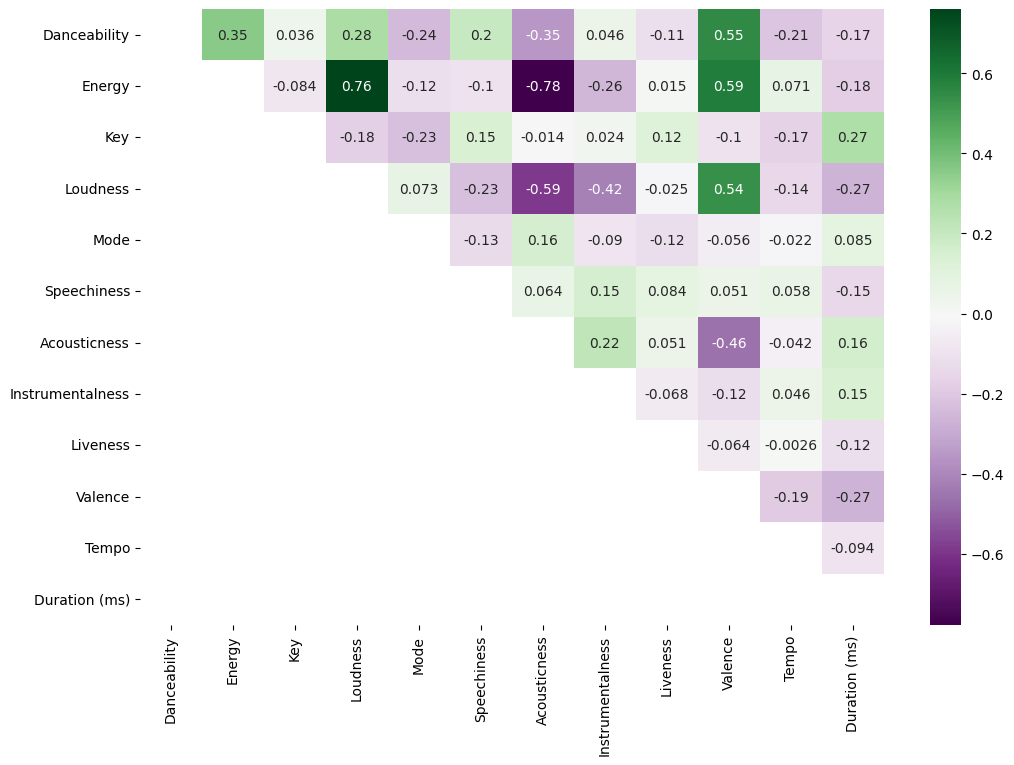

In [6]:
plt.figure(figsize = (12,8))
scaled_music_corr = scaled_music.corr()
maskval = np.tril(scaled_music_corr)
sns.heatmap(scaled_music_corr, annot=True, cmap='PRGn', mask=maskval, square=False)

In [17]:
scaled_music_corr_abs = scaled_music_corr.abs()

to_drop = list()

for column in scaled_music_corr_abs.columns:
    if scaled_music_corr_abs.loc['Energy', column] < 0.3:
        to_drop.append(column)
to_drop

['Key',
 'Mode',
 'Speechiness',
 'Instrumentalness',
 'Liveness',
 'Tempo',
 'Duration (ms)']

In [18]:
scaled_music['energy_category'] = round(scaled_music['Energy'] / 0.01, 0)
scaled_music_dataset_first = scaled_music.drop(columns = to_drop, axis = 1)
scaled_music_dataset = scaled_music_dataset_first.drop('Energy', axis = 1)
scaled_music_dataset.head()

,Danceability,Loudness,Acousticness,Valence,energy_category
0,0.134535,-0.096662,0.077482,0.108464,11.0
1,0.088883,-0.102427,0.000413,0.072745,13.0
2,0.121393,-0.065368,0.002497,0.199286,15.0
3,0.097702,-0.141506,0.030258,0.114344,11.0
4,0.102198,-0.094660,0.010831,0.104108,14.0


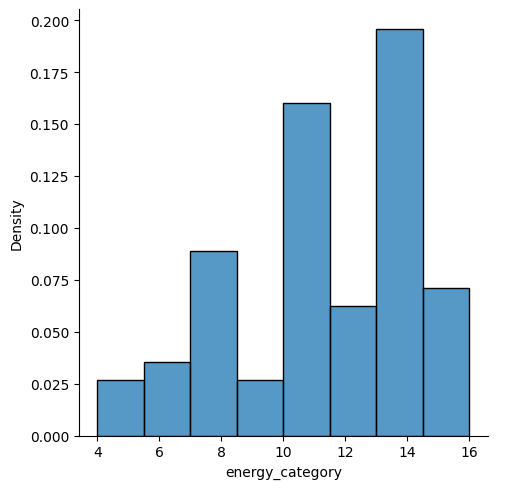

In [19]:
sns.FacetGrid(scaled_music_dataset, height=5) \
    .map(sns.histplot, 'energy_category', stat = "density") \
    .add_legend();

<AxesSubplot: >

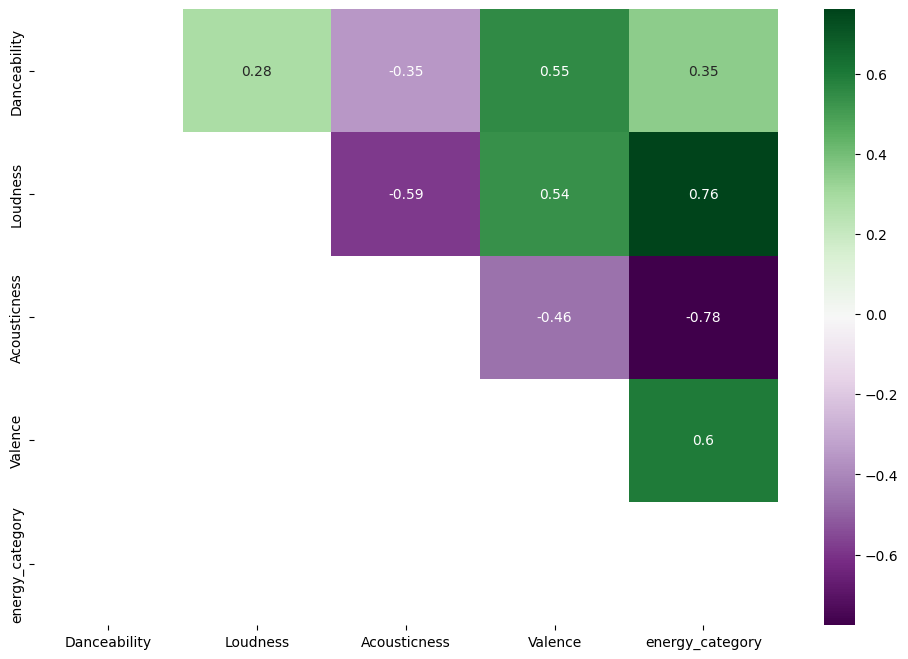

In [20]:
plt.figure(figsize = (12,8))
scaled_music_dataset_corr = scaled_music_dataset.corr()
maskval_dataset = np.tril(scaled_music_dataset_corr)
sns.heatmap(scaled_music_dataset_corr, annot=True, cmap='PRGn', mask=maskval_dataset)

## Part 3.2 - Running the Model
This will take the clean data and run the model on it. We will test for the right number of neighbors, and work from there.

In [27]:
scaled_music_dataset['energy_category'] = pd.Categorical(scaled_music_dataset['energy_category'])
train, test = train_test_split(scaled_music_dataset, test_size=(1/len(scaled_music_dataset['energy_category'])) , random_state=1) 
# test_size = 0.001 for our current dataset will change to 0.1 during the actual model for 10-fold validation.
# train_size will also be removed.
X_train = train.drop('energy_category', axis = 1)
y_train = train['energy_category']
X_test = test.drop('energy_category', axis = 1)
y_test = test['energy_category']


In [33]:
best_iteration = -1
current_highest_accuracy = -1
results = {}
for i in range(1, len(X_train['Loudness'])):
    print(i, best_iteration, current_highest_accuracy)
    neigh = KNeighborsClassifier(n_neighbors=i)
    # The model is properly trained here
    neigh_fit = neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    accuracy_val = accuracy_score(y_test, pred)
    results[i] = accuracy_val
    if (accuracy_val > current_highest_accuracy):
        current_highest_accuracy = accuracy_val
        best_iteration = i
        print("Iteration updated", i, best_iteration, current_highest_accuracy)
print("{} as K gives the best accuracy for {}%\nNumber of Rows: {}".format(best_iteration, current_highest_accuracy * 100, len(X_train['Loudness'])))

1 -1 -1
Iteration updated 1 1 0.0
2 1 0.0
3 1 0.0
4 1 0.0
5 1 0.0
6 1 0.0
7 1 0.0
8 1 0.0
9 1 0.0
10 1 0.0
11 1 0.0
12 1 0.0
13 1 0.0
14 1 0.0
15 1 0.0
Iteration updated 15 15 1.0
16 15 1.0
17 15 1.0
18 15 1.0
19 15 1.0
20 15 1.0
21 15 1.0
22 15 1.0
23 15 1.0
24 15 1.0
25 15 1.0
26 15 1.0
27 15 1.0
28 15 1.0
29 15 1.0
30 15 1.0
31 15 1.0
32 15 1.0
33 15 1.0
34 15 1.0
35 15 1.0
36 15 1.0
37 15 1.0
38 15 1.0
39 15 1.0
40 15 1.0
41 15 1.0
42 15 1.0
43 15 1.0
44 15 1.0
45 15 1.0
46 15 1.0
47 15 1.0
48 15 1.0
49 15 1.0
50 15 1.0
51 15 1.0
52 15 1.0
53 15 1.0
54 15 1.0
55 15 1.0
56 15 1.0
57 15 1.0
58 15 1.0
59 15 1.0
60 15 1.0
61 15 1.0
62 15 1.0
63 15 1.0
64 15 1.0
65 15 1.0
66 15 1.0
67 15 1.0
68 15 1.0
69 15 1.0
70 15 1.0
71 15 1.0
72 15 1.0
73 15 1.0
15 as K gives the best accuracy for 100.0%
Number of Rows: 74


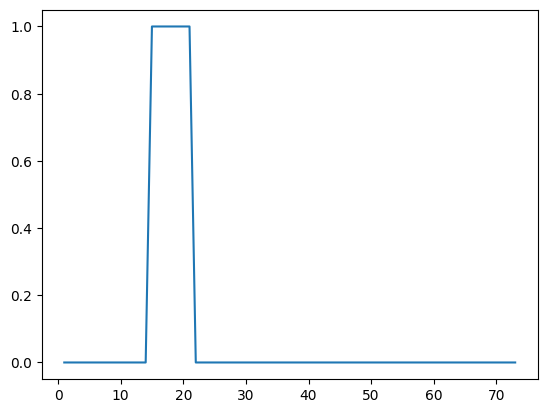

In [32]:
plt.plot(results.keys(), results.values())